In [94]:
import numpy as np
import pandas as pd
from datetime import date


<font color=blue> <b>NPV</b> (Net Present Value) <b>vs XNPV</b> (Extended Net Present Value)</font>
    
Both of these are financial metrics used to determine the Present Value of Future Cash Flows. However, there is a slight difference between them. 

While NPV calculates the Net Present Value of a stream of <u>**cash flows occurring at regular intervals**</u>, XNPV calculation handles <u>__cash flows occurring at irregular intervals.__</u>

<i>NPV = CF1 / (1+r)^1 + CF2 / (1+r)^2 + ... + CFn / (1+r)^n - Initial Investment </i>

Where CF stands for cash flow, r is the discount rate, and n is the number of periods.


<i>XNPV = CF1 / (1+r)^((D1-D0)/365) + CF2 / (1+r)^((D2-D0)/365) + ... + CFn / (1+r)^((Dn-D0)/365) - Initial Investment</i>

Where CF stands for cash flow, r is the discount rate, D0 is the starting date, and D1, D2, etc. are the actual dates on which the cash flows occur.

In a nutshell, while both NPV and XNPV calculate the present value of future cash flows, NPV is used for regular cash flows while XNPV is used for irregular cash flows.



 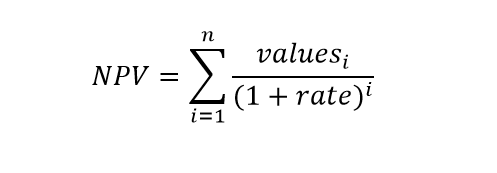
 
 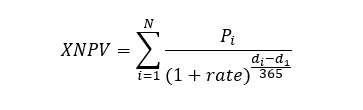 

In [191]:
cashflows = [-2000, 1000, 800, 1100]
period    = [0, 1, 2, 3]
discount  = .08

# NPV Calculation #

In [194]:
np.asarray([ cf/(1+discount)**p for p, cf in zip(period, cashflows)]).sum()

485.01244728953895

# XNPV Calculation #

In [193]:
dates     = [date(2023,1,1), date(2024,2,5), date(2025,3, 10), date(2025, 12,25)]

# calculating days of each cash inflow since the investment (cash outflow)
days_elapsed      = [ (di - dates[0]).days for di in dates]
days_elapsed


[0, 400, 799, 1089]

In [195]:
pv = [ cf/(1+discount)**(d/365) for cf, d in zip(cashflows, days_elapsed)]

#pv = [ cf/(1+discount)**((d-dates[0]).days/365) for cf, d in zip(cashflows, dates)]

In [196]:
pv

[-2000.0, 919.1179057309685, 675.9646933037808, 874.32088045348]

In [197]:
sum(pv)

469.4034794882292

In [201]:
cashflows    = [-4000, 1000, 800, -1100, 5000]
period       = [0,1,2,3,4]
dates        = [date(2023,1,1), date(2024,2,5), date(2025,3, 10), date(2025, 12,25), date(2026,1,10)]
days_elapsed = [ (di - dates[0]).days for di in dates]

In [202]:
npv_pv = [cf/(1+discount)**p for p, cf in zip(period, cashflows)]

In [203]:
npv_pv

[-4000.0,
 925.9259259259259,
 685.8710562414266,
 -873.2154651221865,
 3675.1492639822663]

In [204]:
sum(npv_pv)

413.7307810274324

In [180]:
xnpv_pv = [ cf/(1+discount)**((di-dates[0]).days/365) for cf, di in zip(cashflows, dates)]

In [205]:
xnpv_pv

[-4000.0,
 919.1179057309685,
 675.9646933037808,
 -874.32088045348,
 3960.800959645224]

In [206]:
sum(xnpv_pv)

681.5626782264926

In [207]:
df_npv = pd.DataFrame(zip(cashflows,period, npv_pv), columns=['cashflow', 'period', 'dcf'])

In [208]:
df_npv

,cashflow,period,dcf
0,-4000,0,-4000.000000
1,1000,1,925.925926
2,800,2,685.871056
3,-1100,3,-873.215465
4,5000,4,3675.149264


In [209]:
sum(df_npv.dcf)

413.7307810274324

In [210]:
df_xnpv =pd.DataFrame(zip(cashflows,dates, days_elapsed, xnpv_pv), columns=['cashflow', 'dates', 'days_elapsed', 'dcf'])

In [211]:
df_xnpv

,cashflow,dates,days_elapsed,dcf
0,-4000,2023-01-01,0,-4000.000000
1,1000,2024-02-05,400,919.117906
2,800,2025-03-10,799,675.964693
3,-1100,2025-12-25,1089,-874.320880
4,5000,2026-01-10,1105,3960.800960


In [212]:
sum(df_xnpv.dcf)

681.5626782264926